In [1]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os 
import pandas as pd
import numpy as np

In [2]:
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/test'

In [3]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels


In [4]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
happy completed
relaxed completed
sad completed


In [5]:
print(train)


                                                 image  label
0        images/train\angry\100035066_bb2792d5c8_b.jpg  angry
1      images/train\angry\10069504164_436856871c_b.jpg  angry
2       images/train\angry\1007148341_fdd49a7384_b.jpg  angry
3       images/train\angry\1007803967_b4b8ebc62c_b.jpg  angry
4      images/train\angry\10131474585_997d88e066_b.jpg  angry
...                                                ...    ...
15916     images/train\sad\9953954964_4330fdf081_b.jpg    sad
15917     images/train\sad\9959873844_67dce9ca9f_b.jpg    sad
15918     images/train\sad\9982050784_3765f84803_b.jpg    sad
15919     images/train\sad\9983838563_5683af739a_b.jpg    sad
15920     images/train\sad\9997069306_1c36187ca9_b.jpg    sad

[15921 rows x 2 columns]


In [6]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)


angry completed
happy completed
relaxed completed
sad completed


In [7]:
print(test)
print(test['image'])

                                               image  label
0       images/test\angry\100035066_bb2792d5c8_b.jpg  angry
1     images/test\angry\10222334643_1153586191_b.jpg  angry
2     images/test\angry\10235296784_792682a57b_b.jpg  angry
3     images/test\angry\10247870803_c26d5ee172_b.jpg  angry
4        images/test\angry\10325720_7181f50c66_b.jpg  angry
...                                              ...    ...
2438       images/test\sad\94323258_7b142c8c47_b.jpg    sad
2439       images/test\sad\96060071_504ffcfeb1_b.jpg    sad
2440       images/test\sad\96810746_d26fdc4d6b_b.jpg    sad
2441       images/test\sad\97968156_85f06a11c5_b.jpg    sad
2442       images/test\sad\98202017_b23e3a3aca_b.jpg    sad

[2443 rows x 2 columns]
0         images/test\angry\100035066_bb2792d5c8_b.jpg
1       images/test\angry\10222334643_1153586191_b.jpg
2       images/test\angry\10235296784_792682a57b_b.jpg
3       images/test\angry\10247870803_c26d5ee172_b.jpg
4          images/test\angry\103257

In [8]:
from tqdm.notebook import tqdm

In [9]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,color_mode='grayscale')
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features

In [10]:
train_features = extract_features(train['image']) 

  0%|          | 0/15921 [00:00<?, ?it/s]

In [11]:
test_features = extract_features(test['image'])

  0%|          | 0/2443 [00:00<?, ?it/s]

In [12]:
x_train = train_features/255.0
x_test = test_features/255.0

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [15]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [16]:
y_train = to_categorical(y_train,num_classes = 4)
y_test = to_categorical(y_test,num_classes = 4)

In [18]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Define the model
model = Sequential()

# Convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())

# Fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

# Output layer
model.add(Dense(4, activation='softmax'))


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [20]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 100, validation_data = (x_test,y_test)) 

Epoch 1/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 57s 433ms/step - accuracy: 0.2893 - loss: 1.3633 - val_accuracy: 0.2517 - val_loss: 1.3710
Epoch 2/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 54s 435ms/step - accuracy: 0.2944 - loss: 1.3517 - val_accuracy: 0.2562 - val_loss: 1.3750
Epoch 3/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 53s 427ms/step - accuracy: 0.2879 - loss: 1.3509 - val_accuracy: 0.2517 - val_loss: 1.3762
Epoch 4/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 54s 429ms/step - accuracy: 0.2912 - loss: 1.3517 - val_accuracy: 0.2579 - val_loss: 1.3793
Epoch 5/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 53s 426ms/step - accuracy: 0.2990 - loss: 1.3533 - val_accuracy: 0.2648 - val_loss: 1.3822
Epoch 6/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 53s 426ms/step - accuracy: 0.3151 - loss: 1.3484 - val_accuracy: 0.2988 - val_loss: 1.3652
Epoch 7/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 54s 432ms/step - accuracy: 0.3336 - loss: 1.3438 - val_accuracy: 0.3140 - val_loss: 1.3583
Epoch 8/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 54s 431ms/step - accuracy: 0.3387 -

In [21]:
model_json = model.to_json()
with open("a5_main_model_72_accuracy.json",'w') as json_file:
    json_file.write(model_json)
model.save("a5_main_model_72_accuracy.h5")

In [22]:
from keras.models import model_from_json

In [23]:
json_file = open("a5_main_model_72_accuracy.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("a5_main_model_72_accuracy.h5")

In [24]:
label = ['angry','happy','relaxed','sad']

In [25]:
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0
    

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of angrey
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step

D:\10_Projects\Ai-ml\Dog Behaviour Detection System using cnn\Real-Time-Dog-Behavior-Detection-using-CNN\myenv\lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
model prediction is  angry


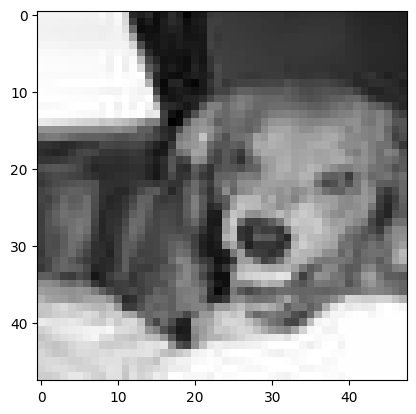

In [27]:
image = 'images/train/angry/44847165_bc900b8ae2_b.jpg'
print("original image is of angrey")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of angrey
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
model prediction is  angry


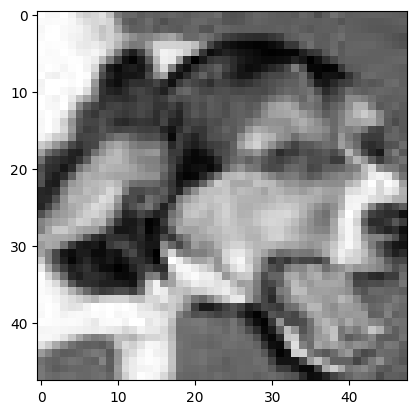

In [28]:
image = 'images/train/angry/170777980_ac86df8bfa_b.jpg'
print("original image is of angry")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
model prediction is  happy


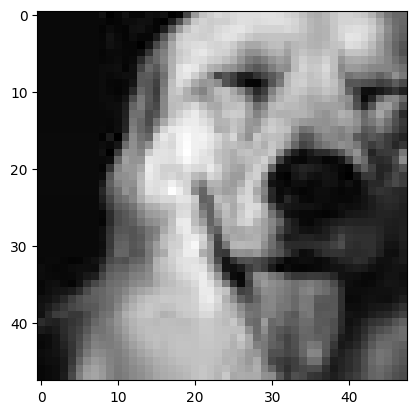

In [29]:
image = 'images/train/happy/1499434_f60c8ca375_b.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of relaxed
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
model prediction is  relaxed


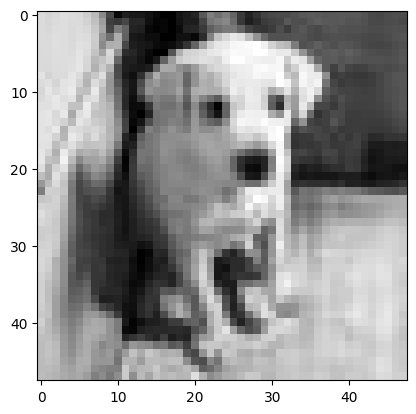

In [30]:
image = 'images/train/relaxed/33763162_776b62eea4_b.jpg'
print("original image is of relaxed")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
model prediction is  sad


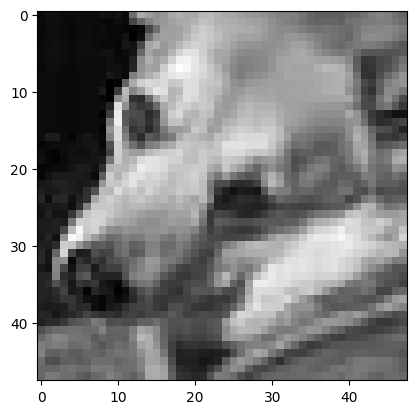

In [31]:
image = 'images/train/sad/33864042_741d0ec8f0_b.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')